In [1]:
#Linear Classifiers: Support Vector Machines

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [5]:
from sklearn.svm import SVC

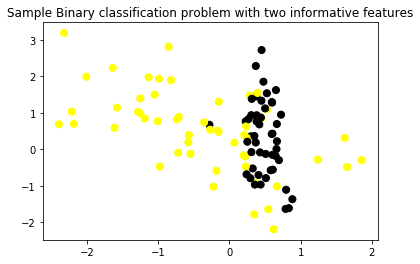

In [7]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample Binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples=100,n_features=2, n_redundant=0,
                                n_informative=2,n_clusters_per_class=1,flip_y=0.1,
                                class_sep=0.5,random_state=0)
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2,marker='o',s=50,cmap=cmap_bold)
plt.show()

In [12]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


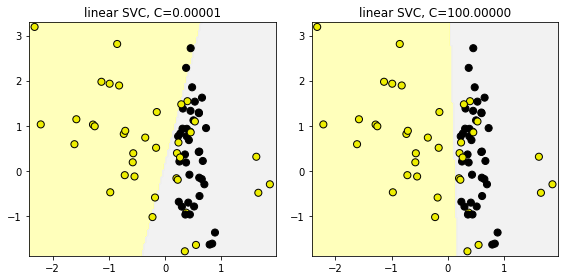

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
fig,subaxes = plt.subplots(1,2,figsize=(8,4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = "linear SVC, C={:.5f}".format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,None,None,title,subplot)
    
plt.tight_layout()    

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state=0)
clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.
     format(clf.score(X_train,y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94


In [2]:
#synthetic datasets
# Linear support Vector Machines

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2,
                                 n_redundant =0, n_informative = 2,
                                 n_clusters_per_class =1, flip_y=0.1,
                                 class_sep=0.5,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

print('Accuracy of LSVM classifier of training set : {:.2f}'
      .format(clf.score(X_train,y_train)))
print('Accuracy of LSVM classifier of testing set : {:.2f}'
      .format(clf.score(X_test, y_test)))


Accuracy of LSVM classifier of training set : 0.80
Accuracy of LSVM classifier of testing set : 0.76


In [6]:
# Application to real dataset

from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state =0)

clf = LinearSVC().fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC Classifier on test set:{:.2f}'
      .format(clf.score(X_test, y_test)))


Accuracy of Linear SVC classifier on training set: 0.94
Accuracy of Linear SVC Classifier on test set:0.92
